In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Importing the data pf 5 different years 
df_2011 = pd.read_csv("gt_2011.csv")
df_2012 = pd.read_csv("gt_2012.csv")
df_2013 = pd.read_csv("gt_2013.csv")
df_2014 = pd.read_csv("gt_2014.csv")
df_2015 = pd.read_csv("gt_2015.csv")

In [3]:
#### Merging the datasets to a single Dataset
df = df_2011.append(df_2012)
df = df.append(df_2013)
df = df.append(df_2014)
df = df.append(df_2015)

In [4]:
#### Checking the total observations 
print(len(df))
print(len(df_2011)+len(df_2012)+len(df_2013)+len(df_2014)+len(df_2015))

36733
36733


In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [7]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


In [9]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

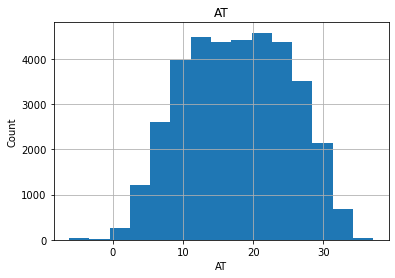

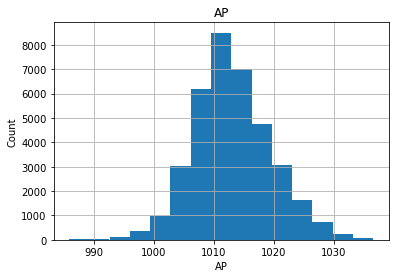

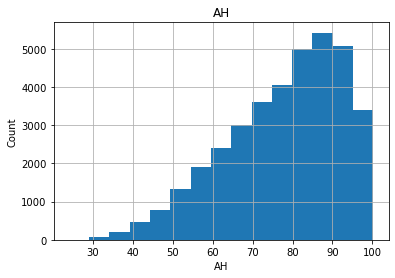

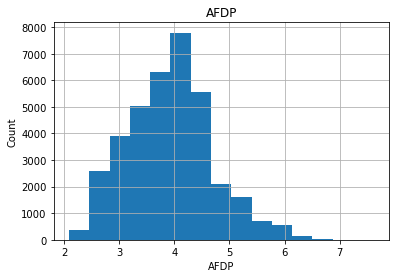

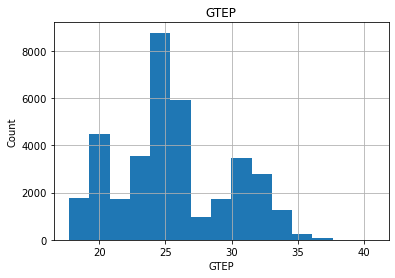

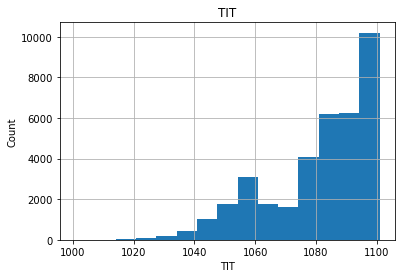

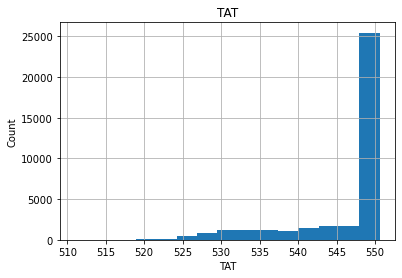

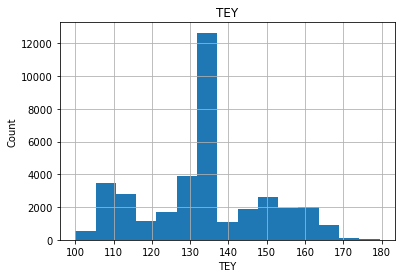

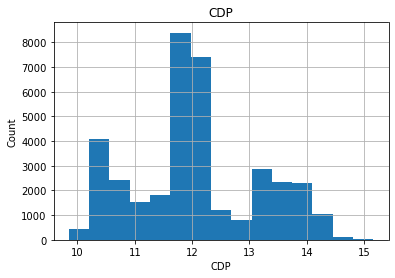

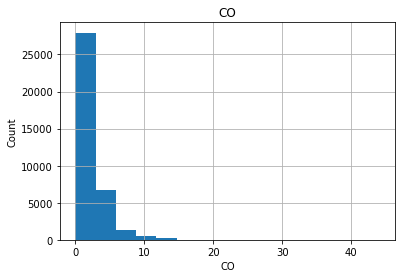

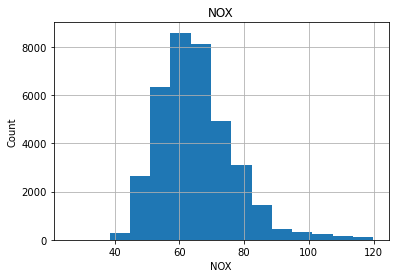

In [10]:
#### Checking the distribution of the variables
for variables in df.columns:
    df1 = df.copy()
    #df1[variables] = np.log(df1[variables])
    df1[variables].hist(bins=15)
    plt.xlabel(variables)
    plt.ylabel('Count')
    plt.title(variables)
    plt.show()

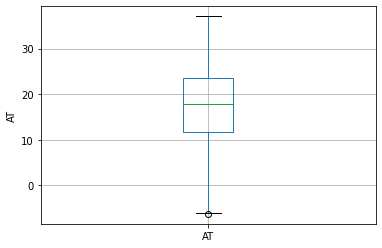

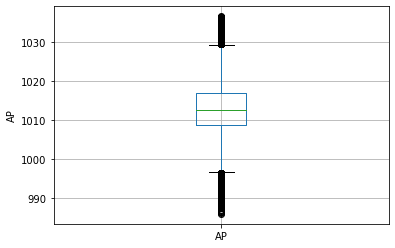

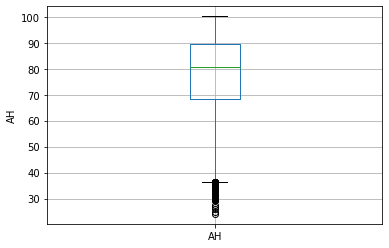

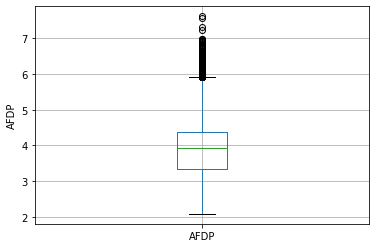

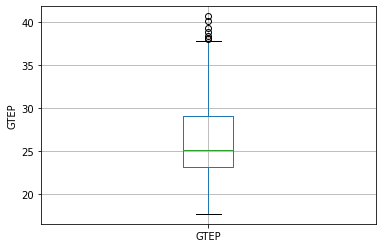

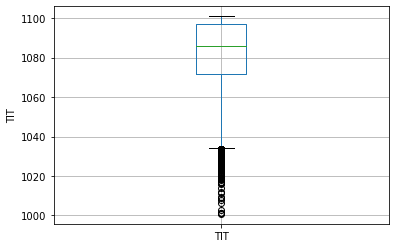

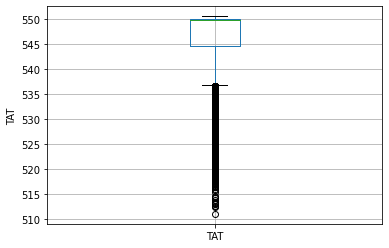

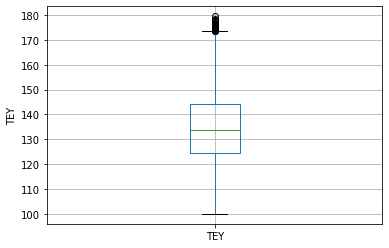

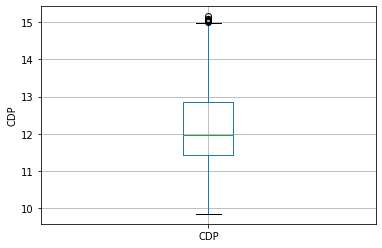

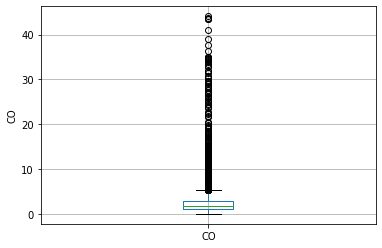

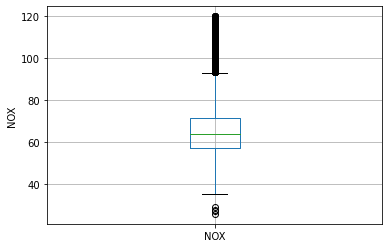

In [11]:
#### Checking for outliers
for variables in df.columns:
    df1 = df.copy()
    #df[variables]=np.exp(df[variables])
    df.boxplot(column=variables)
    plt.ylabel(variables)
    plt.show()

In [12]:
#### Scaling the variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaling_variables = [variables for variables in df.columns if variables not in ['NOX']]
len(scaling_variables)

10

In [13]:
scaler = MinMaxScaler()
scaler.fit(df[scaling_variables])

MinMaxScaler()

In [14]:
scaled_data = pd.DataFrame(scaler.fit_transform(df[scaling_variables]),columns=scaling_variables)
scaled_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,0.249727,0.647291,0.782894,0.269481,0.272873,0.853147,0.980288,0.435959,0.385552,0.007397
1,0.242929,0.639409,0.790252,0.268594,0.271657,0.852148,0.985848,0.435959,0.384421,0.010146
2,0.233960,0.641379,0.798437,0.270749,0.273351,0.856144,0.989386,0.441369,0.412685,0.010227
3,0.230247,0.639409,0.806004,0.270387,0.269919,0.856144,0.988880,0.440488,0.402887,0.005231
4,0.230432,0.629557,0.802693,0.269898,0.270180,0.850150,0.984584,0.435959,0.387813,0.006056


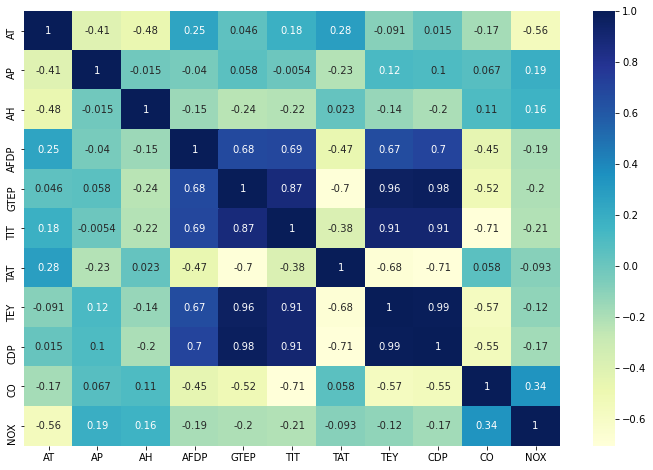

In [15]:
#### Checking the correlation
pd.options.display.float_format = '{:,.2f}'.format
cleaned_data = pd.concat([scaled_data,df['NOX'].reset_index(drop=True)],axis=1)
corr_matrix = cleaned_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [16]:
X=cleaned_data.iloc[:,:-1]
y=cleaned_data.iloc[:,-1]

In [17]:
#### Splitting our data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 12)
print(len(X_train),len(y_train),len(X_test),len(y_test))

25713 25713 11020 11020


In [18]:
#### Out of the total variables, we'll select only those variables that explain the target variable most 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
sel_from_model = SelectFromModel(Lasso(alpha=0.05,random_state=12))
sel_from_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=12))

In [19]:
selected_feat = X_train.columns[(sel_from_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_from_model.estimator_.coef_ == 0)))

total features: 10
selected features: 8
features with coefficients shrank to zero: 2


In [20]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [21]:
#### Applying Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lin_model.predict(X_test)
y_train_predict = lin_model.predict(X_train)

In [23]:
#### Checking R2 scores and mse
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train,y_train_predict)
test_r2 = r2_score(y_test,y_pred)
mse_train = mean_squared_error(y_train,y_train_predict)
mse_test = mean_squared_error(y_test,y_pred)
print("R2 Score of Training data: ",train_r2)
print("R2 Score of Test data: ",test_r2)
print("Mean Sqd Error of Training data: ",mse_train)
print("Mean Sqd Error of Test data: ",mse_test)

R2 Score of Training data:  0.5706432338497374
R2 Score of Test data:  0.5728226737579324
Mean Sqd Error of Training data:  57.819950955360866
Mean Sqd Error of Test data:  59.96445066843739


In [24]:
#### Applying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

In [25]:
lin_model.fit(X_train_poly,y_train)
y_pred_poly = lin_model.predict(X_test_poly)
y_train_predict_poly = lin_model.predict(X_train_poly)

In [26]:
#### Checking R2 scores and mse
train_r2_poly = r2_score(y_train,y_train_predict_poly)
test_r2_poly = r2_score(y_test,y_pred_poly)
print("R2 Score of Training data: ",train_r2_poly)
print("R2 Score of Test data: ",test_r2_poly)
mse_train_poly = mean_squared_error(y_train,y_train_predict_poly)
mse_test_poly = mean_squared_error(y_test,y_pred_poly)
print("Mean Sqd Error of Training data: ",mse_train_poly)
print("Mean Sqd Error of Test data: ",mse_test_poly)

R2 Score of Training data:  0.8521176473653692
R2 Score of Test data:  0.8431010228199423
Mean Sqd Error of Training data:  19.914791265931242
Mean Sqd Error of Test data:  22.02448584949109
